# Deep Learning for Advanced Object Detection

### Make sure you change the "Runtime" to T4.

### Install Required Packages

In [2]:
!pip install labelme opencv-python matplotlib albumentations pandas Pillow requests pydot


Defaulting to user installation because normal site-packages is not writeable


In [3]:
!pip install tensorflow-metal #to leverage the Apple Metal GPU

Defaulting to user installation because normal site-packages is not writeable


### Import packages

In [2]:
import os
import time
import uuid
import cv2
import tensorflow as tf
import json
import numpy as np
from matplotlib import pyplot as plt
import albumentations as alb
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO
import base64
# from IPython.display import Image, display

/Users/adityadhanotia/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


## This notebook will use existing images from GitHub repo created by the team:

[GitHub Repository](https://github.com/christianingul/deep_learning_for_advanced_facial_recognition)

The team utilized OpenCV and Labelme to create images and corresponding labels. To ensure the project is reproducible and provides a seamless experience, we have uploaded the generated images and labels to GitHub.

**IMPORTANT:** In order to access and load the images and labels from GitHub, you will need a GitHub token. This token should be added in the specific code cell labeled **"Fetch Image and Label URLs from GitHub".** Here is the relevant code snippet:

def get_github_contents(user, repo, path, branch='main'):

    """
    Fetch the file paths within a directory in a GitHub repository using the GitHub API.
    """
    token = 'ADD TOKEN HERE' 

This setup allows users to automatically load images and labels without manual intervention.

Furthermore, if you are interested in creating and labeling your own images, we will provide detailed instructions on how to use OpenCV and Labelme. This information is available under the section titled **"How to use OpenCV & Labelme - IGNORE IF YOU WANT TO USE EXISTING IMAGES".**

## How to use OpenCV & Labelme - IGNORE IF YOU WANT TO USE EXISTING IMAGES

### 1. Collecting Primary Data/Images Using OpenCV

Before running the code below you need to create a folder structure where you can store the images you intend to capture below. Currently, an example path is in place below, but under the "img_path" variable you'll need to specify your own unique path. Further, within the folder that will store your capture images there also needs to be folder, which you can call "labels". This folder will be paramount for the data annotation stage that comes after capturing the images!


In [7]:
img_path = 'IMAGE_PATH_HERE' #Specify your img_path here
number_images = 33 #Select number of images you want

In [ ]:
cap = cv2.VideoCapture(0) #If the video camera does not open try to change the number within "VideoCapture(HERE)"
for imgnum in range(number_images):
    print('Collecting image {}'.format(imgnum))
    ret, frame = cap.read()
    imgname = os.path.join(img_path,f'{str(uuid.uuid1())}.jpg')
    cv2.imwrite(imgname, frame)
    cv2.imshow('frame', frame)
    time.sleep(1) #Can be changed to allow more time

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

### Label your images using LabelMe

After you've captured your images, and stored them in your image folder follow the instructions the below before running the code. When you are ready to run the code "!labelme" the annotation library will open a new screen. When you get to its UI a few key decisions need to be made:

### Run LabelMe


In [ ]:
!labelme # a & d allows you to go back and forth

#### Labelme Guidelines


#### Step 1:
After running "!labelme" a new window will open up, and the first thing you need to do is open up the "image" folder created earlier. To do so, click "file" in the top left corner, and proceed with selecting "Open Dir". Step 2 below will expand on next steps.

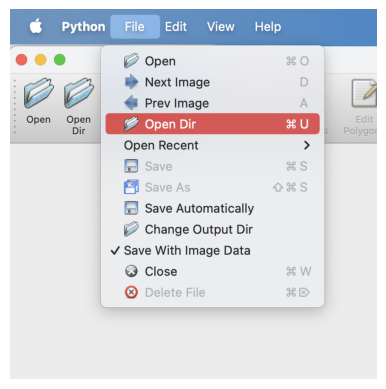

In [27]:

url_1 = 'https://drive.google.com/uc?export=download&id=180lJ58W0mqgl1o6eJZnZRgUSr4AxAlUZ'
# Get the content of the image
response = requests.get(url_1)
img = Image.open(BytesIO(response.content))

# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()


#### Step 2: 
After opening up an "Open Dir" in step 1 we need to select the folder, which contains our images. In our case the folder would look something like below:

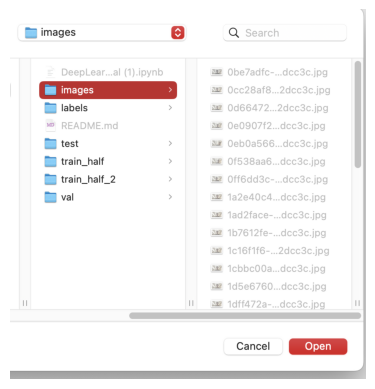

In [28]:
#Step 1
url_2 = 'https://drive.google.com/uc?export=download&id=1wex9SdiFDF1nFSSI1jOve9vOqt31fuvP'
# Get the content of the image
response = requests.get(url_2)
img = Image.open(BytesIO(response.content))

# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()


#### Step 3: Output from Step 1 & 2

After completing step 1 & 2 your images from the "image" folder should be displayed in the "File List" in the bottom right side of the user inter face. You can click on any image and maneuver back and forth between images by clicking either "a" or "d"!

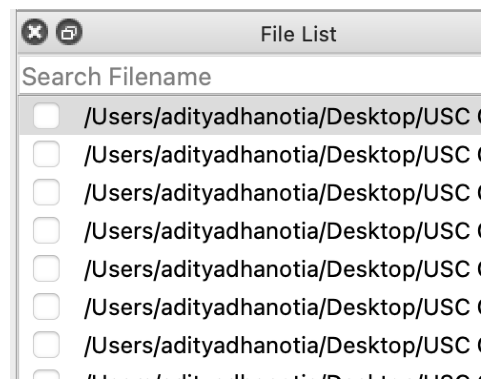

In [29]:
#Step 3
url_3 = 'https://drive.google.com/uc?export=download&id=1W-WG8ngao4HPFRbhU_S0nTqKDumGqInl'
# Get the content of the image
response = requests.get(url_3)
img = Image.open(BytesIO(response.content))

# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()


#### Step 4:

The next thing you would want to do is click "file" again in the top left corner. Then proceed to select the output directory, which should be your "labels" folder, which is under the same folder as your image folder. This step will allow us to automatically save our annotations in the "labels" folder!

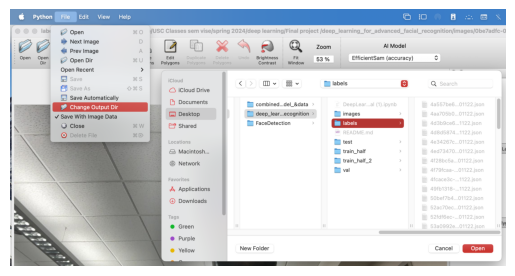

In [30]:
#Step 1
url_4 = 'https://drive.google.com/uc?export=download&id=1PhEhscGXmjteAR1QRFvVwNwasIsQMqXH'
# Get the content of the image
response = requests.get(url_4)
img = Image.open(BytesIO(response.content))

# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()


#### Step 5:
After specifying the output directory click "Save Automatically" under file again, which will allow your annotations to automatically be saved in the "labels" folder.

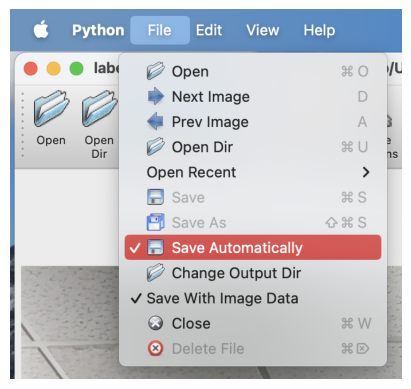

In [31]:
url_5 = 'https://drive.google.com/uc?export=download&id=1J0me4-j1uJeK0kTPHCnxjg6MV0-38Ngm'

# Get the content of the image
response = requests.get(url_5)
img = Image.open(BytesIO(response.content))

# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()



#### Step 6:
Now it is time to create our annotations and bounding boxes. Select any image in your file list, and then Right-click the image and a menu will emerge. This menu should include "Create Rectangle" like below:

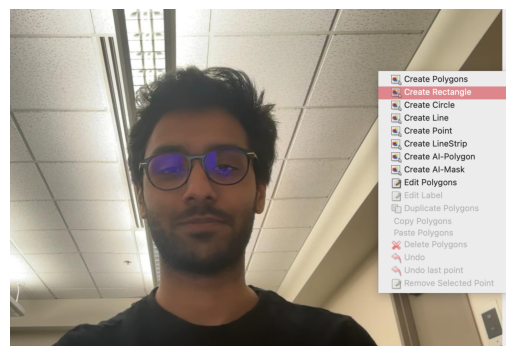

In [32]:
url_6 = 'https://drive.google.com/uc?export=download&id=13YipwxRmOedgCtLOimVA-Uvnnb_d7TUE'

# Get the content of the image
response = requests.get(url_6)
img = Image.open(BytesIO(response.content))

# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

#### Step 7:
After clicking "Create Rectangle" we can now manually draw the bounding box. It is straightforward: 1. Select the starting point of your bounding box "Top left" and then specify the "Bottom Right" ending point

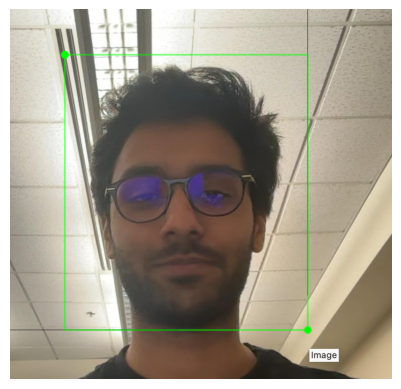

In [33]:
url_7 = 'https://drive.google.com/uc?export=download&id=1LY8LQkbiQcUjWbTTngfgjpr77MjyrAEZ'
# Get the content of the image
response = requests.get(url_7)
img = Image.open(BytesIO(response.content))

# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()



#### Step 8: Label the Image

The last step is to label the image after drawing the bounding box. A table will emerge after you specify the top left and bottom right bounding box coordinates. Type in the top display box the name of the class and then "ok". This will create a json file in your "labels" folder with the bounding box coordinates and name of the class in the image!


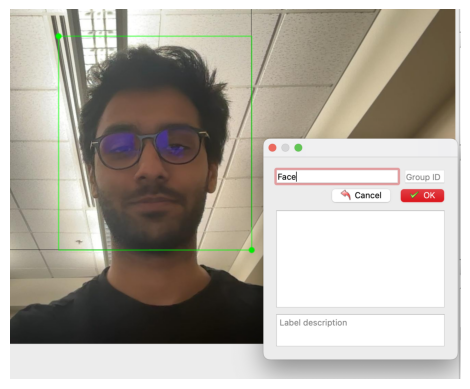

In [34]:
url_8 = 'https://drive.google.com/uc?export=download&id=18Iosnn2xnWuwLIrglnwhGRTCK-Snxwhn'
# Get the content of the image
response = requests.get(url_8)
img = Image.open(BytesIO(response.content))

# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()


The process above should allow you to manually annotate your images. Run the "!labelme" below and try it yourself.

### Load your images into a Tensorflow Data Pipeline

Here you need to specify your "image" folder path to be able to load in the images.

In [ ]:
images = tf.data.Dataset.list_files('PATH_TO_IMAGES_HERE') #*.jpg allows us to do a wild card search
#We also convert our images into a TensorFlow 'Dataset' object that is designed to work with a large collection of image files efficiently

In [ ]:
def load_image(x): #This function decodes the JPEG-encoded image stored in the string tensor byte_img into a tensor that TensorFlow can work with. The output is a 3-D tensor representing the image.
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img

#images = images.map(load_image) #.map() applies this function to each image

### IGNORE IF YOU LOADED IN IMAGES FROM GITHUB: Split data into training, validation and testing folders
Here, you will need to add new folders in your directory. Create a train, val and test folder where each folder has two subfolders "images" & "labels". Subsequently, you need to manually move our images from the "image" folder to train, val and testing folders. You can define the split. Our group used a 70%, 14% and 16% split. After the images have been moved to their new folders we can move on to a code, which will automatically move your labels files to train, test and val folders. The new structure should look something like the image below

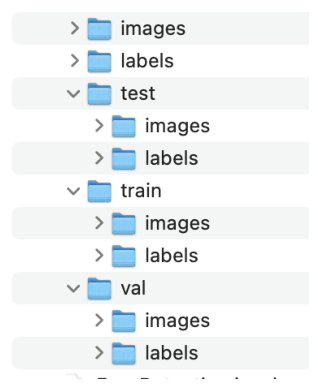

In [35]:
url_9 = 'https://drive.google.com/uc?export=download&id=1ax3w2Qg94wQrN_6dXufOCmiSMu8bkvqh'
# Get the content of the image
response = requests.get(url_9)
img = Image.open(BytesIO(response.content))

# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

### Code to move the matching labels to matching images
If you completed the step above you can run the code below. The code automatically matches your labels with the corresponding image in either train, test, or val!

In [ ]:
import os

for folder in ['train', 'test', 'val']:
    image_folder = os.path.join('SPECIFY YOUR PATH HERE', folder, 'images')
    for file in os.listdir(image_folder):
        # print(file)

        filename = file.split('.')[0] + '.json'
        # print(filename)
        existing_filepath = os.path.join('SPECIFY YOUR PATH HERE', 'labels', filename)
        print(existing_filepath)

        if os.path.exists(existing_filepath):
            print('Executing')
            new_filepath = os.path.join('SPECIFY YOUR PATH HERE', folder, 'labels', filename)
            print(new_filepath)

            os.replace(existing_filepath, new_filepath)

#### THIS MARKS THE END OF OPENCV AND LABELME

If you chose this route and were able to capture your own images, labels and move the appropriate files to their respective folders congratulations. The next step is to go to the "Creating an Augmentation Pipeline" section. However, the code will not run as is, unless you specified four labels like the group did when running this project. I would recommend STOPPING here and then running the code, which reads in the files from GitHub. This way you can get familiar with the code, and then make changes later with your own primary data!

## Preprocessing - USING EXISTING IMAGES FROM the GitHub Repo

#### Create a Local Directory to store images and labels!

In [3]:
import os

# Base directory for all data
base_directory = '/Users/adityadhanotia/Desktop/USC Classes sem vise/spring 2024/deep learning/Final project /test_run/data' #pathname if you want to run on colab '/content/data'

# Subdirectories for different dataset splits
subdirs = ['train', 'val', 'test']

# Loop through each subdir and create 'images' and 'labels' subdirectories within each
for subdir in subdirs:
    # Path for images and labels within each subdir
    image_path = os.path.join(base_directory, subdir, 'images')
    label_path = os.path.join(base_directory, subdir, 'labels')

    # Create directories
    os.makedirs(image_path, exist_ok=True)
    os.makedirs(label_path, exist_ok=True)

    # Print paths to confirm creation
    print(f"Created directory: {image_path}")
    print(f"Created directory: {label_path}")


Created directory: /Users/adityadhanotia/Desktop/USC Classes sem vise/spring 2024/deep learning/Final project /test_run/data/train/images
Created directory: /Users/adityadhanotia/Desktop/USC Classes sem vise/spring 2024/deep learning/Final project /test_run/data/train/labels
Created directory: /Users/adityadhanotia/Desktop/USC Classes sem vise/spring 2024/deep learning/Final project /test_run/data/val/images
Created directory: /Users/adityadhanotia/Desktop/USC Classes sem vise/spring 2024/deep learning/Final project /test_run/data/val/labels
Created directory: /Users/adityadhanotia/Desktop/USC Classes sem vise/spring 2024/deep learning/Final project /test_run/data/test/images
Created directory: /Users/adityadhanotia/Desktop/USC Classes sem vise/spring 2024/deep learning/Final project /test_run/data/test/labels


### Fetch Image and Label URLs from GitHub

In [7]:
def get_github_contents(user, repo, path, branch='main'):
    """
    Fetch the file paths within a directory in a GitHub repo using the GitHub API.
    """
    token = 'ADD YOUR TOKEN HERE'

    #token = os.getenv('GITHUB_TOKEN')
    if not token:
        raise EnvironmentError("GitHub token not found in environment variables.")

    api_url = f"https://api.github.com/repos/{user}/{repo}/contents/{path}?ref={branch}"
    headers = {"Authorization": f"token {token}"}

    response = requests.get(api_url, headers=headers)

    if response.status_code == 401:
        raise ValueError("Authorization failed. Check your GitHub token.")
    response.raise_for_status()

    content_list = response.json()

    return [content['download_url'] for content in content_list]

# Initialize the dictionary for storing URLs
dataset_urls = {
    'train': {
        'images': [],
        'labels': []
    },
    'val': {
        'images': [],
        'labels': []
    },
    'test': {
        'images': [],
        'labels': []
    }
}


#### Populate the "dataset_urls" dictionary with the Images and Labels from GitHub!

In [8]:
# Populate the dictionary with URLs from GitHub


####### Load Image URLs

dataset_urls['test']['images'] = get_github_contents(
    user='adityadhanotia',
    repo='deep_learning_for_advanced_facial_recognition',
    path='test/images'
)


dataset_urls['val']['images'] = get_github_contents(
    user='adityadhanotia',
    repo='deep_learning_for_advanced_facial_recognition',
    path='val/images'
)

dataset_urls['train']['images'] = get_github_contents(
    user='adityadhanotia',
    repo='deep_learning_for_advanced_facial_recognition',
    path='train_half/images'
)

dataset_urls['train']['images'] += get_github_contents(
    user='adityadhanotia',
    repo='deep_learning_for_advanced_facial_recognition',
    path='train_half_2/images'
)


####### Load Label URLs

dataset_urls['train']['labels'] += get_github_contents(
    user='adityadhanotia',
    repo='deep_learning_for_advanced_facial_recognition',
    path='train_half/labels'
)

dataset_urls['train']['labels'] += get_github_contents(
    user='adityadhanotia',
    repo='deep_learning_for_advanced_facial_recognition',
    path='train_half_2/labels'
)

dataset_urls['test']['labels'] +=  get_github_contents(
    user='adityadhanotia',
    repo='deep_learning_for_advanced_facial_recognition',
    path='test/labels'
)


dataset_urls['val']['labels'] = get_github_contents(
    user='adityadhanotia',
    repo='deep_learning_for_advanced_facial_recognition',
    path='val/labels'
)



In [9]:
len(dataset_urls['train']['images'])

70

### Load both Images and Labels into a TensorFlow dataset using the fetched labels

In [10]:
import requests
import os

def download_and_save_file(url, base_dir):
    """Download a file and save it to the specified directory based on its type and the URL structure."""
    file_name = url.split('/')[-1]
    parts = url.split('/')

    # Determine file type based on file extension
    file_type = 'labels' if file_name.endswith('.json') else 'images'

    # Determine subdirectory based on the URL parts
    if 'train_half' in url or 'train_half_2' in url: #When uploading images to GitHub we had to create two folders for training due to GitHub upload limits
        sub_dir = 'train'
    elif 'val' in url:
        sub_dir = 'val'
    elif 'test' in url:
        sub_dir = 'test'
    else:
        raise ValueError("URL does not specify a known dataset split")

    # Full path to save the file
    save_path = os.path.join(base_dir, sub_dir, file_type, file_name)

    # Create the directory if it doesn't exist
    os.makedirs(os.path.dirname(save_path), exist_ok=True)

    # Download and save the file
    response = requests.get(url)
    if response.status_code == 200:
        with open(save_path, 'wb') as f:
            f.write(response.content)
        print(f"Downloaded {file_name} to {save_path}")
    else:
        print(f"Failed to retrieve {url}")

# Base directory for all data
base_directory = '/Users/adityadhanotia/Desktop/USC Classes sem vise/spring 2024/deep learning/Final project /test_run/data'


#### Move Images and Labels to correct directory and sub-directories

In [11]:
# Loop over each dataset split and download both images and labels
for split in dataset_urls:
    for file_type in dataset_urls[split]:
        for url in dataset_urls[split][file_type]:
            download_and_save_file(url, base_directory)


Downloaded d5266402-01ce-11ef-b9a4-acde48001122.jpg to /Users/adityadhanotia/Desktop/USC Classes sem vise/spring 2024/deep learning/Final project /test_run/data/train/images/d5266402-01ce-11ef-b9a4-acde48001122.jpg
Downloaded d62473a8-01ce-11ef-b9a4-acde48001122.jpg to /Users/adityadhanotia/Desktop/USC Classes sem vise/spring 2024/deep learning/Final project /test_run/data/train/images/d62473a8-01ce-11ef-b9a4-acde48001122.jpg
Downloaded d90561cc-01ce-11ef-b9a4-acde48001122.jpg to /Users/adityadhanotia/Desktop/USC Classes sem vise/spring 2024/deep learning/Final project /test_run/data/train/images/d90561cc-01ce-11ef-b9a4-acde48001122.jpg
Downloaded da4fe052-01ce-11ef-b9a4-acde48001122.jpg to /Users/adityadhanotia/Desktop/USC Classes sem vise/spring 2024/deep learning/Final project /test_run/data/train/images/da4fe052-01ce-11ef-b9a4-acde48001122.jpg
Downloaded daf2c2ea-01ce-11ef-b9a4-acde48001122.jpg to /Users/adityadhanotia/Desktop/USC Classes sem vise/spring 2024/deep learning/Final pr

### Now let's perfom a sanity check to see if we can load the images

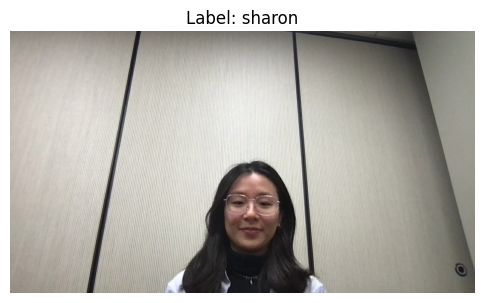

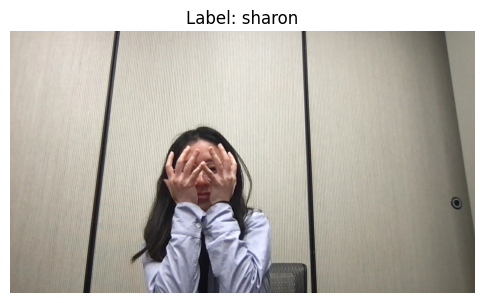

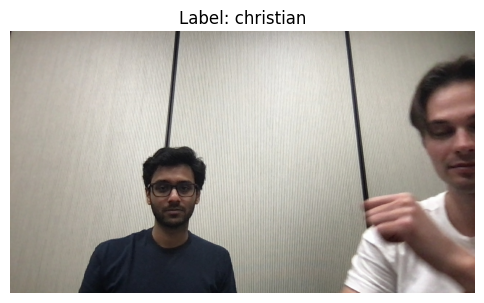

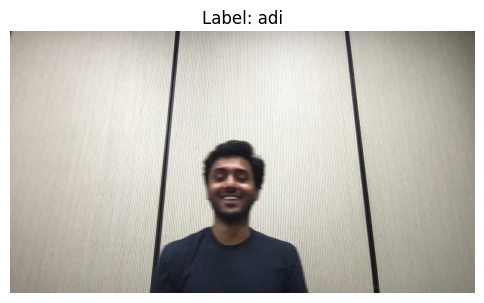

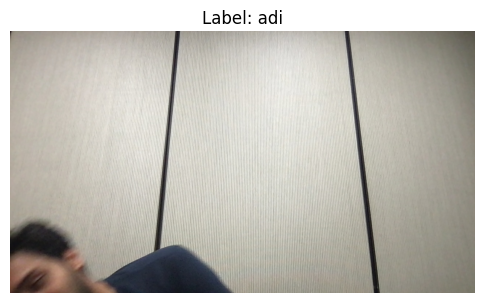

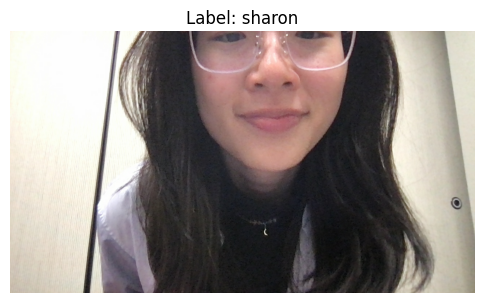

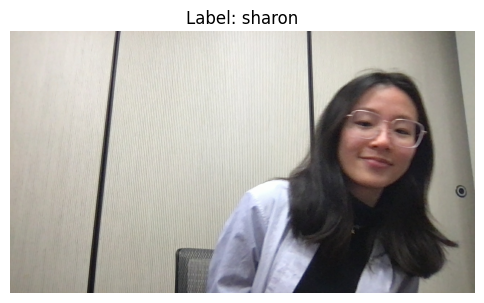

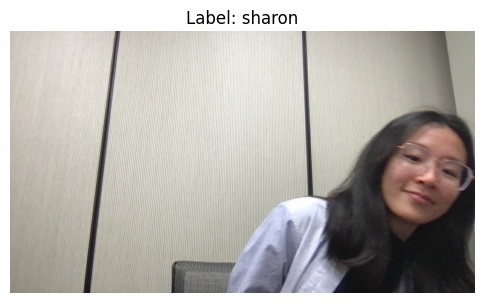

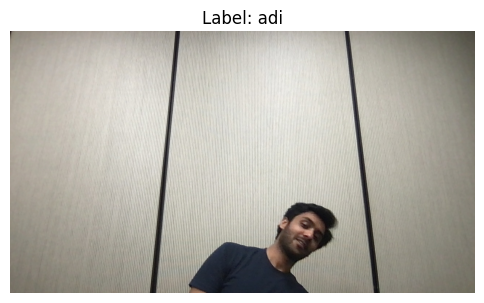

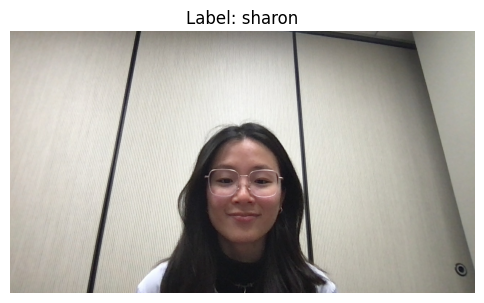

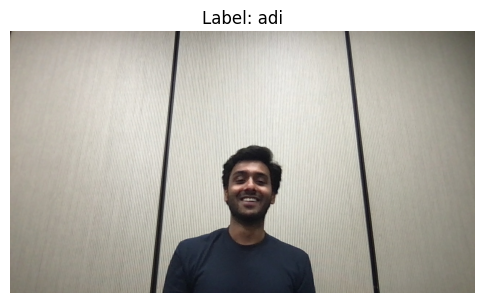

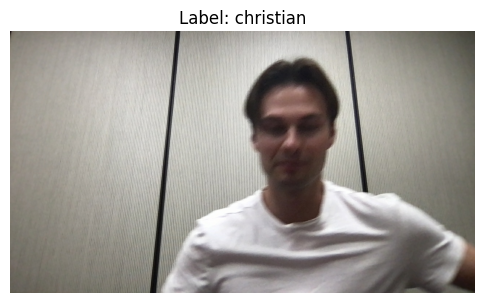

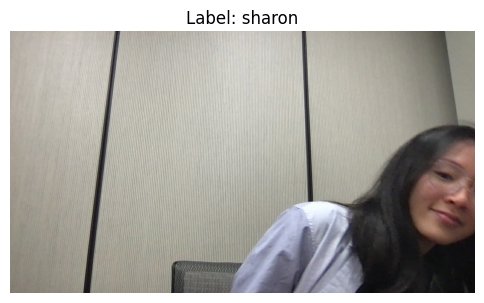

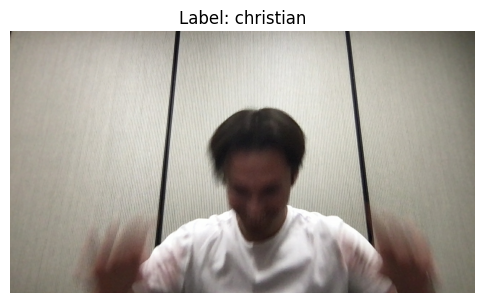

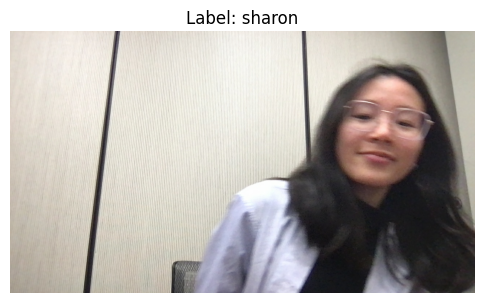

In [6]:
import json
import random

def load_and_display_image_with_label(image_path, label_path):
    """Load and display an image along with its corresponding label."""
    try:
        # Load and decode the image
        byte_img = tf.io.read_file(image_path)
        image = tf.io.decode_jpeg(byte_img, channels=3)

        # Load label
        with open(label_path, 'r') as file:
            label = json.load(file)

        # Display image and label
        plt.figure(figsize=(6, 6))
        plt.imshow(image.numpy())
        plt.title(f"Label: {label['shapes'][0]['label']}")
        plt.axis('off')
        plt.show()
    except Exception as e:
        print(f"Failed to load or display {image_path}: {e}")


sub_dirs = ['train', 'val', 'test']
num_samples = 5

for sub_dir in sub_dirs:
    image_dir = os.path.join(base_directory, sub_dir, 'images')
    label_dir = os.path.join(base_directory, sub_dir, 'labels')

    #get list of images and labels in each sub_dirs
    images = os.listdir(image_dir)
    labels = os.listdir(label_dir)

    # Create a dictionary to match images to labels
    label_mapping = {label.split('.')[0]: label for label in labels}

    # Filter images that have corresponding labels
    matched_images = [img for img in images if img.split('.')[0] in label_mapping]

    if len(matched_images) >= num_samples:
        random_images = random.sample(matched_images, num_samples)
        random_labels = [label_mapping[img.split('.')[0]] for img in random_images]

        for image_name, label_name in zip(random_images, random_labels):
            image_path = os.path.join(image_dir, image_name)
            label_path = os.path.join(label_dir, label_name)
            load_and_display_image_with_label(image_path, label_path)
    else:
        print(f"Not enough matching files in {sub_dir} to sample {num_samples} pairs.")


**Comment:** The labels look correct, awesome!

In [18]:
import os

# Set the path to the directory
image_directory = '/Users/adityadhanotia/Desktop/USC Classes sem vise/spring 2024/deep learning/Final project /test_run/data/train/images'

# List all files in the directory
all_files = os.listdir(image_directory)

# Filter the list to include only .jpg files
jpg_files = [file for file in all_files if file.endswith('.jpg')]

# Count the number of .jpg files
number_of_images = len(jpg_files)

print(f"There are {number_of_images} .jpg images in the directory.")


There are 70 .jpg images in the directory.


#### Create a Tensorflow dataset

In [20]:
#Now we need to store the images in a TensorFlow Datafile
import tensorflow as tf


# just an example of how we can load all images into a tensorflow dataset using * to search for images folder under each sub_dirs and *jpg to search for all jpg matching filenames 
all_images = tf.data.Dataset.list_files('/Users/adityadhanotia/Desktop/USC Classes sem vise/spring 2024/deep learning/Final project /test_run/data/*/images/*.jpg', shuffle=False)


In [24]:
type(all_images)

tensorflow.python.data.ops.from_tensor_slices_op._TensorSliceDataset

### Image Augmentation - Using Albumentations
#### Now it is time to augment our images! Run the code below to set up our intended augmentations

Here we will use the Albumentations library to augment our images. The library is very powerful and allows for a wide range of augmentations. As you can see here we have defined the class labels as the names of our group members beforehand. And mapped the 'string' names to INTEGER values in the dictionary below. This will allow us to use the integer values in our model later on!


In [25]:
#Defining a dictionary, which will later be used to convert names to integers

class_labels = {
    'sharon': 0,
    'adi': 1,
    'christian': 2,
    'none': 3  # Using this for cases with no detected face
}


In [34]:
#open a test label path to see how a class label looks 

label_path = "/Users/adityadhanotia/Desktop/USC Classes sem vise/spring 2024/deep learning/Final project /test_run/data/test/labels/4afc6366-01cf-11ef-b9a4-acde48001122.json"

with open(label_path, 'r') as f:
                label = json.load(f)

In [35]:
label['shapes'][0]['label']

'sharon'

In [26]:
img_augmentor = alb.Compose([
                         alb.HorizontalFlip(p=0.5),
                         alb.RandomBrightnessContrast(p=0.2),
                         alb.RandomGamma(p=0.2),
                         alb.RGBShift(p=0.2),
                         alb.VerticalFlip(p=0.5)],
                       bbox_params=alb.BboxParams(format='albumentations', label_fields=['class_labels']))

## Creating an Augmentation Pipeline

#### Create Directory for Augmented Images

Following code will help us store the augumented images in a new directory called (`aug_data`). Subsequently map the (`images and labels`) in the subfolders (`train`, `test`, `val`) which we will use to feed into our Deep Learning Model.

In [27]:
# Base directory for augmented data
base_directory = '/Users/adityadhanotia/Desktop/USC Classes sem vise/spring 2024/deep learning/Final project /test_run/aug_data'

# Subdirectories for different dataset splits
subdirs = ['train', 'val', 'test']

# Loop through each subdir and create 'images' and 'labels' subdirectories within each
for subdir in subdirs:
    # Path for images and labels within each subdir
    image_path = os.path.join(base_directory, subdir, 'images')
    label_path = os.path.join(base_directory, subdir, 'labels')

    # Create directories
    os.makedirs(image_path, exist_ok=True)
    os.makedirs(label_path, exist_ok=True)

    # Print paths to confirm creation
    print(f"Created directory: {image_path}")
    print(f"Created directory: {label_path}")


Created directory: /Users/adityadhanotia/Desktop/USC Classes sem vise/spring 2024/deep learning/Final project /test_run/aug_data/train/images
Created directory: /Users/adityadhanotia/Desktop/USC Classes sem vise/spring 2024/deep learning/Final project /test_run/aug_data/train/labels
Created directory: /Users/adityadhanotia/Desktop/USC Classes sem vise/spring 2024/deep learning/Final project /test_run/aug_data/val/images
Created directory: /Users/adityadhanotia/Desktop/USC Classes sem vise/spring 2024/deep learning/Final project /test_run/aug_data/val/labels
Created directory: /Users/adityadhanotia/Desktop/USC Classes sem vise/spring 2024/deep learning/Final project /test_run/aug_data/test/images
Created directory: /Users/adityadhanotia/Desktop/USC Classes sem vise/spring 2024/deep learning/Final project /test_run/aug_data/test/labels


#### Run Image Augmentation Pipeline

#### This script is designed for processing and augmenting images stored in the local base directory. It handles image loading, checking for annotations, and applying image augmentations. The script is structured to process images in three subdirectories (`train`, `test`, and `val`) and save augmented images in a separate directory (`aug_data`). The annotations are loaded from JSON files and the bounding box coordinates are normalized to the image dimensions (1280x720). The script also includes error handling to catch and log any exceptions during processing.

#### Process Overview

1. **Iterate Over Subdirectories**:
   - `train`, `test`, and `val`.
   - For each subdirectory, we construct a path to the images and iterates through each image.

   ---

2. **Image Loading**:
   - Each image is loaded using OpenCV (`cv2.imread`). If an image fails to load (returns `None`), it skips to the next image.

   ---

3. **Default Label Handling**:
   - Initializes default coordinates for bounding boxes and a default class label (3), indicating no detected face.

   ---

4. **Label File Checking and Loading**:
   - For each image, the script checks for a corresponding JSON label file.
   - If the label file exists, it is loaded and parsed:
     - Retrieves annotation data (bounding box coordinates and class labels).
     - Normalizes bounding box coordinates relative to image dimensions (1280x720).
     - Converts string labels to integer class labels based on a predefined mapping (`class_labels`).

   ---

5. **Image Augmentation**:
   - Each image is augmented 60 times using a hypothetical function `img_augmentor`, which applies transformations to the image and adjusts bounding box coordinates accordingly.
   - The augmented images are saved in a separate directory (`/content/aug_data`) structured similarly to the input directory.

   ---

6. **Annotation Handling**:
   - For each augmented image, an annotation dictionary is created:
     - The annotation includes the image filename, bounding box, and class label.
     - If no bounding box exists in the augmented data, defaults are used.

   ---
   
7. **Writing annotations to json file**:
   - (`json.dump(annotation, f)`) writes the annotation dictionary to a labels file we open as f, in JSON format. This function converts the Python dictionary into a JSON string and writes it to the specified file. 


In [36]:
#### Takes about 2m to run

for sub_dir in ['train', 'test', 'val']:

    image_folder = os.path.join('/Users/adityadhanotia/Desktop/USC Classes sem vise/spring 2024/deep learning/Final project /test_run/data', sub_dir, 'images')

    for image in os.listdir(image_folder):
        img = cv2.imread(os.path.join(image_folder, image))
        if img is None:
            continue  # Skip if the image is not loaded properly

        coords = [0, 0, 0.00001, 0.00001]  # Default coordinates

        label_path = os.path.join('/Users/adityadhanotia/Desktop/USC Classes sem vise/spring 2024/deep learning/Final project /test_run/data', sub_dir, 'labels', f'{image.split(".")[0]}.json')
        class_label = 3  # Default class for no detected face

        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                label = json.load(f)
            if label['shapes']:  # Check if there are any annotations
                coords = [label['shapes'][0]['points'][0][0], label['shapes'][0]['points'][0][1],
                          label['shapes'][0]['points'][1][0], label['shapes'][0]['points'][1][1]]
                coords = list(np.divide(coords, [1280, 720, 1280, 720]))  # Normalize coordinates
                class_label = class_labels[label['shapes'][0]['label']]  # convert string label to integer 

        try:
            for x in range(60):  # Augment each image 60 times
                augmented = img_augmentor(image=img, bboxes=[coords], class_labels=[[class_label]])  # Ensure class label is integer
                cv2.imwrite(os.path.join('/Users/adityadhanotia/Desktop/USC Classes sem vise/spring 2024/deep learning/Final project /test_run/aug_data', sub_dir, 'images',
                                         f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])

                annotation = {'image': f'{image.split(".")[0]}.{x}.jpg'}
                if len(augmented['bboxes']) > 0:
                    annotation['bbox'] = augmented['bboxes'][0]
                    annotation['class'] = augmented['class_labels'][0]  # Ensure correct indexing
                else:
                    annotation['bbox'] = [0, 0, 0, 0]
                    annotation['class'] = 3  # Use the integer for 'none'

                with open(os.path.join('/Users/adityadhanotia/Desktop/USC Classes sem vise/spring 2024/deep learning/Final project /test_run/aug_data', sub_dir, 'labels',
                                       f'{image.split(".")[0]}.{x}.json'), 'w') as f:
                    json.dump(annotation, f)

        except Exception as e:
            print(e)


**Comment:** We are now creating 60 augmented images for each original image!

In [37]:
image_path = '/Users/adityadhanotia/Desktop/USC Classes sem vise/spring 2024/deep learning/Final project /test_run/aug_data/test/images/4afc6366-01cf-11ef-b9a4-acde48001122.0.jpg'

label_path = '/Users/adityadhanotia/Desktop/USC Classes sem vise/spring 2024/deep learning/Final project /test_run/aug_data/test/labels/4afc6366-01cf-11ef-b9a4-acde48001122.0.json'
byte_img = tf.io.read_file(image_path)
image = tf.io.decode_jpeg(byte_img, channels=3)

# Load label
with open(label_path, 'r') as file:
    label = json.load(file)
    print(label)

label_path

{'image': '4afc6366-01cf-11ef-b9a4-acde48001122.0.jpg', 'bbox': [0.42909307065217395, 0.18372584541062809, 0.5641134510869565, 0.5173611111111112], 'class': [0]}


'/Users/adityadhanotia/Desktop/USC Classes sem vise/spring 2024/deep learning/Final project /test_run/aug_data/test/labels/4afc6366-01cf-11ef-b9a4-acde48001122.0.json'

### Loading the newly created Augmented Images to our Tensorflow Dataset

### Process the augmented images & Create datasets for training, validation, and testing

A few things are happeneing here:
1. initiate load image function that decodes the JPEG-encoded image into a tensor for the use of our neural network. The output is a 3-D tensor representing the image.
2. Resizes each image to 224x224 pixels to match the input size required by MobileNetV2 model which we will be using in our facial recognition system.
3. optimize the number of parallel operations automatically based on available resources. (`num_parallel_calls=tf.data.AUTOTUNE`) allows TensorFlow to determine the optimal number of images to process in parallel.

In [38]:
def load_image(file_path):
    """Load and decode an image from a given file path."""
    image = tf.io.read_file(file_path)
    image = tf.image.decode_jpeg(image, channels=3)
    return image


In [39]:
train_images = tf.data.Dataset.list_files('/Users/adityadhanotia/Desktop/USC Classes sem vise/spring 2024/deep learning/Final project /test_run/aug_data/train/images/*.jpg', shuffle=False)
train_images = train_images.map(load_image, num_parallel_calls=tf.data.experimental.AUTOTUNE) #optimizes the number of parallel operations automatically based on available resources 
train_images = train_images.map(lambda x: tf.image.resize(x, (224,224)), num_parallel_calls=tf.data.AUTOTUNE)  # Resizing the image to 224x224 to match MobileNetV2
train_images = train_images.map(lambda x: tf.ensure_shape(x / 255, (224, 224, 3)), num_parallel_calls=tf.data.AUTOTUNE)  # Normalizing images, so they are between 0 & 1


In [40]:
test_images = tf.data.Dataset.list_files('/Users/adityadhanotia/Desktop/USC Classes sem vise/spring 2024/deep learning/Final project /test_run/aug_data/test/images/*.jpg', shuffle=False)
test_images = test_images.map(load_image,num_parallel_calls=tf.data.AUTOTUNE)
test_images = test_images.map(lambda x: tf.image.resize(x, (224,224)),num_parallel_calls=tf.data.AUTOTUNE)
test_images = test_images.map(lambda x: tf.ensure_shape(x / 255, (224, 224, 3)),num_parallel_calls=tf.data.AUTOTUNE)

In [41]:
val_images = tf.data.Dataset.list_files('/Users/adityadhanotia/Desktop/USC Classes sem vise/spring 2024/deep learning/Final project /test_run/aug_data/val/images/*.jpg', shuffle=False)
val_images = val_images.map(load_image,num_parallel_calls=tf.data.AUTOTUNE)
val_images = val_images.map(lambda x: tf.image.resize(x, (224,224)),num_parallel_calls=tf.data.AUTOTUNE)
val_images = val_images.map(lambda x: tf.ensure_shape(x / 255, (224, 224, 3)),num_parallel_calls=tf.data.AUTOTUNE)

### Creating a Label Loading Function

Simialrly, we load the labels as tensors and ensure the **class label has shape 1** and **bounding box has shape 4** for the 4 coordinates.

In [42]:
def load_labels(label_path):
    # Convert the tensor to a numpy string within the TensorFlow graph
    label_path = label_path.numpy().decode("utf-8")

    with open(label_path, 'r', encoding="utf-8") as file:
        label_data = json.load(file)
        class_label = label_data['class']  #integers here
        bbox = label_data['bbox']

    # Convert class label and bbox to tensors
    class_label_tensor = tf.convert_to_tensor(class_label, dtype=tf.int32) #Converting integers to tensors
    bbox_tensor = tf.convert_to_tensor(bbox, dtype=tf.float32)

    return class_label_tensor, bbox_tensor


In [43]:
def set_shapes(class_label, bbox):
    """Sets the shapes for tensors to ensure compatibility in batch operations."""
    class_label.set_shape([1])  # Ensure there is a single class label per example
    bbox.set_shape([4])  # Ensure each bounding box has four coordinates
    return class_label, bbox


### Loading our Labels to the Tensorflow Dataset & Creating label datasets for training, validation, and testing

In [44]:
# Define the directories for labels
train_labels = tf.data.Dataset.list_files('/Users/adityadhanotia/Desktop/USC Classes sem vise/spring 2024/deep learning/Final project /test_run/aug_data/train/labels/*.json', shuffle=False)
train_labels = train_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.int32, tf.float32]),
                                num_parallel_calls=tf.data.AUTOTUNE)
train_labels = train_labels.map(set_shapes,num_parallel_calls=tf.data.AUTOTUNE) #Sets the shape of the Tensors
#Bounding box [x_min, y_min, x_max, y_max], hence shape 4,

val_labels = tf.data.Dataset.list_files('/Users/adityadhanotia/Desktop/USC Classes sem vise/spring 2024/deep learning/Final project /test_run/aug_data/val/labels/*.json', shuffle=False)
val_labels = val_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.int32, tf.float32]),
                            num_parallel_calls=tf.data.AUTOTUNE)
val_labels = val_labels.map(set_shapes,num_parallel_calls=tf.data.AUTOTUNE)


test_labels = tf.data.Dataset.list_files('/Users/adityadhanotia/Desktop/USC Classes sem vise/spring 2024/deep learning/Final project /test_run/aug_data/test/labels/*.json', shuffle=False)
test_labels = test_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.int32, tf.float32]),
                              num_parallel_calls=tf.data.AUTOTUNE)
test_labels = test_labels.map(set_shapes,num_parallel_calls=tf.data.AUTOTUNE)

### Final Tensorflow dataset - Merging Images & Labels

In [45]:
train = tf.data.Dataset.zip((train_images, train_labels))
train = train.shuffle(5000)    # Shuffle the data
train = train.batch(10)         # Batch the data
train = train.prefetch(5)      # Prefetch 4 batches at a time to improve pipeline efficiency


In [46]:
train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), (TensorSpec(shape=(None, 1), dtype=tf.int32, name=None), TensorSpec(shape=(None, 4), dtype=tf.float32, name=None)))>

In [47]:
test = tf.data.Dataset.zip((test_images, test_labels))
test = test.shuffle(1500)
test = test.batch(10)
test = test.prefetch(5)

In [48]:
test

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), (TensorSpec(shape=(None, 1), dtype=tf.int32, name=None), TensorSpec(shape=(None, 4), dtype=tf.float32, name=None)))>

In [49]:
val = tf.data.Dataset.zip((val_images, val_labels))
val = val.shuffle(1500)
val = val.batch(10)
val = val.prefetch(5)

In [50]:
val

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), (TensorSpec(shape=(None, 1), dtype=tf.int32, name=None), TensorSpec(shape=(None, 4), dtype=tf.float32, name=None)))>

In [51]:
len(train_images),len(train_labels), len(val_images),len(val_labels), len(test_images), len(test_labels)

(4200, 4200, 900, 900, 840, 840)

### Deep Learning Modeling - MobileNetV2


#### Building a Multi-Output Model with MobileNetV2

#### The function `build_model` constructs a neural network model based on MobileNetV2, designed for a dual-purpose of classifying images into categories and predicting bounding boxes for object localization. Here is a detailed breakdown of each part of the function:
 
1. We load the MobileNetV2 model pre-trained on the ImageNet dataset, excluding the last fully connected classification layer. We utilize the pre-trained weights on the ImageNet data, allowing for feature reuse. 

2. (`GlobalAveragePooling2D:`) Reduces each feature map to a single average value, decreasing the data dimensions and preventing overfitting.

3. Construct a classification and bounding box layer on top of MobileNetV2 architecture. We use L2 regularization and dropout to reduce overfitting. Classification has 4 output nodes, corresponding to the 4 class labels, and the bounding box has 4 output nodes, representing the 4 coordinates of the bounding box. Bounding box ouputs are processed through a sigmoid function to ensure the results are b/w 0 and 1 as the coordinates are normalized.



In [52]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2


def build_model(input_shape=(224, 224, 3)):
    # Load MobileNetV2 without the top layer and set it to use ImageNet weights
    base_model = MobileNetV2(include_top=False, weights='imagenet', input_shape=input_shape)

    # Set the layers in the base model to be non-trainable (optional)
    for layer in base_model.layers:
        layer.trainable = False  # You can fine-tune this based on your needs

    # Create the feature extractor part
    base_features = GlobalAveragePooling2D()(base_model.output) #Works similar to a flattening layer

    # Add classification and bounding box heads
    x = Dense(1024, activation='relu', kernel_regularizer=l2(0.01))(base_features)
    x = Dropout(0.5)(x)
    class_output = Dense(4, activation='softmax', name='class_output')(x)

    y = Dense(1024, activation='relu',kernel_regularizer=l2(0.01))(base_features)
    y = Dropout(0.5)(y)
    bbox_output = Dense(4, activation='sigmoid', name='bbox_output')(y)

    # Construct the final model
    model = Model(inputs=base_model.input, outputs=[class_output, bbox_output])
    return model



### Loss Functions - Localization and Classification

#### Custom Localization Loss Function

#### The `localization_loss` function focuses on penalizing errors in both the position and size of the predicted bounding boxes relative to the true boxes. Below is a detailed breakdown of the computation steps:

1. **Delta Coord** calculates the squared difference between the true and predicted coordinates (x, y) of the top-left corner of the bounding boxes. 

    - (`y_true[:,:2] and yhat[:,:2]`) extract the x and y coordinates from the true and predicted bounding boxes, respectively.
    - (`tf.square`)computes the square of the difference to ensure the loss is always positive.
    - (`tf.reduce_sum`) aggregates the squared differences across all examples in the batch
    - We multiply the coordinate loss by 1.5, amplifying its impact on the overall loss function, indicating a higher penalty for errors in box position.

---

2. **Size Loss** calculates the squared difference between the true and predicted bounding box width and height. 

--- 

The final loss is the sum of the weighted coordinate loss function and the size loss. This total loss value is used to update the model parameters during training, encouraging the model to improve both the accuracy of the position and the dimensions of the predicted bounding boxes.



In [53]:
def localization_loss(y_true, yhat):
    delta_coord = tf.reduce_sum(tf.square(y_true[:,:2] - yhat[:,:2])) #Look up reduce_sum again
    #delta coord looks at the first two elements of our bounding box, which is the left side x,y coordinates
    delta_coord_weighted = 1.5 * delta_coord

    #Finding the true height and width
    h_true = y_true[:,3] - y_true[:,1]
    w_true = y_true[:,2] - y_true[:,0]

    #Finding the predicted height and width
    h_pred = yhat[:,3] - yhat[:,1]
    w_pred = yhat[:,2] - yhat[:,0]
    #Using the values above for our loss
    delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true-h_pred))

    return delta_coord_weighted + delta_size

### Display Model Architecture

In [2]:
# facetracker = build_model()

# from keras.utils import plot_model
# plot_model(facetracker, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


### Compiling & Training Model

In [54]:
from tensorflow.keras.optimizers import Adam
from tensorflow import keras

# Define the model
facetracker = build_model()

# Compile the model
facetracker.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss={
        'class_output': 'sparse_categorical_crossentropy', #since our classes are integer values not one-hot encoded we use sparse categorical crossentropy
        'bbox_output': localization_loss
    },
    loss_weights={
        'class_output': 1.0,  # Normal weight for classification
        'bbox_output': 1.5   # Increased weight for bounding box regression
    },
    metrics={
        'class_output': ['accuracy'],
        'bbox_output': ['mse']
    })

logdir='logs'

callbacks_list = [
    keras.callbacks.EarlyStopping(
        monitor="val_class_output_accuracy",
        mode='max', #Consider changing to 'min' and monitoring mse
        patience=4
    ),
    tf.keras.callbacks.TensorBoard(log_dir='logs')
]



# Train the model
history = facetracker.fit(
    train,
    validation_data=val,
    epochs=40,
    callbacks=callbacks_list  # Add any callbacks like TensorBoard, ModelCheckpoint, etc.
)


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/40


2024-05-05 16:48:15.306900: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
2024-05-05 16:48:29.477867: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:23: Filling up shuffle buffer (this may take a while): 1759 of 5000
2024-05-05 16:48:38.491660: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


420/420 ━━━━━━━━━━━━━━━━━━━━ 104s 171ms/step - bbox_output_mse: 0.0586 - class_output_accuracy: 0.8585 - loss: 24.5331 - val_bbox_output_mse: 0.0481 - val_class_output_accuracy: 0.9211 - val_loss: 16.7757
Epoch 2/40


2024-05-05 16:50:07.030129: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:23: Filling up shuffle buffer (this may take a while): 2556 of 5000
2024-05-05 16:50:12.829190: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


420/420 ━━━━━━━━━━━━━━━━━━━━ 76s 138ms/step - bbox_output_mse: 0.0178 - class_output_accuracy: 0.9995 - loss: 13.6375 - val_bbox_output_mse: 0.0445 - val_class_output_accuracy: 0.9033 - val_loss: 12.2871
Epoch 3/40


2024-05-05 16:51:22.560547: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:23: Filling up shuffle buffer (this may take a while): 3694 of 5000
2024-05-05 16:51:24.024770: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


420/420 ━━━━━━━━━━━━━━━━━━━━ 59s 110ms/step - bbox_output_mse: 0.0116 - class_output_accuracy: 0.9994 - loss: 9.5568 - val_bbox_output_mse: 0.0432 - val_class_output_accuracy: 0.9389 - val_loss: 9.6563
Epoch 4/40


2024-05-05 16:52:21.782775: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:23: Filling up shuffle buffer (this may take a while): 3827 of 5000
2024-05-05 16:52:22.852929: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


420/420 ━━━━━━━━━━━━━━━━━━━━ 61s 114ms/step - bbox_output_mse: 0.0083 - class_output_accuracy: 0.9986 - loss: 7.2203 - val_bbox_output_mse: 0.0413 - val_class_output_accuracy: 0.9389 - val_loss: 7.9118
Epoch 5/40


2024-05-05 16:53:22.535644: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:23: Filling up shuffle buffer (this may take a while): 3594 of 5000
2024-05-05 16:53:24.630646: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


420/420 ━━━━━━━━━━━━━━━━━━━━ 59s 108ms/step - bbox_output_mse: 0.0062 - class_output_accuracy: 0.9999 - loss: 5.6404 - val_bbox_output_mse: 0.0403 - val_class_output_accuracy: 0.9389 - val_loss: 6.6686
Epoch 6/40


2024-05-05 16:54:21.945997: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:23: Filling up shuffle buffer (this may take a while): 3826 of 5000
2024-05-05 16:54:23.053679: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


420/420 ━━━━━━━━━━━━━━━━━━━━ 64s 120ms/step - bbox_output_mse: 0.0049 - class_output_accuracy: 0.9991 - loss: 4.4926 - val_bbox_output_mse: 0.0400 - val_class_output_accuracy: 0.9022 - val_loss: 5.8054
Epoch 7/40


2024-05-05 16:55:26.237410: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:23: Filling up shuffle buffer (this may take a while): 3714 of 5000
2024-05-05 16:55:27.514418: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


420/420 ━━━━━━━━━━━━━━━━━━━━ 61s 111ms/step - bbox_output_mse: 0.0044 - class_output_accuracy: 0.9992 - loss: 3.6083 - val_bbox_output_mse: 0.0389 - val_class_output_accuracy: 0.9211 - val_loss: 5.0387


### Evaluate model on the testing set

In [55]:
test_metrics = facetracker.evaluate(test, verbose=2)
test_metrics

84/84 - 11s - 134ms/step - bbox_output_mse: 0.0187 - class_output_accuracy: 1.0000 - loss: 3.7026


[3.7025609016418457, 0.018741222098469734, 1.0]

### Plotting the Model Performance on training and validation data

In [56]:
import pandas as pd

history = pd.DataFrame(history.history)
history


bbox_output_mse  class_output_accuracy       loss  val_bbox_output_mse  \
0         0.038635               0.955714  20.409460             0.048108   
1         0.015495               0.999286  12.406219             0.044520   
2         0.010278               0.998810   8.879436             0.043188   
3         0.007527               0.999286   6.777414             0.041295   
4         0.005900               0.999762   5.333549             0.040295   
5         0.004841               0.999286   4.259174             0.040027   
6         0.004249               0.999524   3.416907             0.038904   

   val_class_output_accuracy   val_loss  
0                   0.921111  16.775675  
1                   0.903333  12.287136  
2                   0.938889   9.656320  
3                   0.938889   7.911826  
4                   0.938889   6.668627  
5                   0.902222   5.805354  
6                   0.921111   5.038678

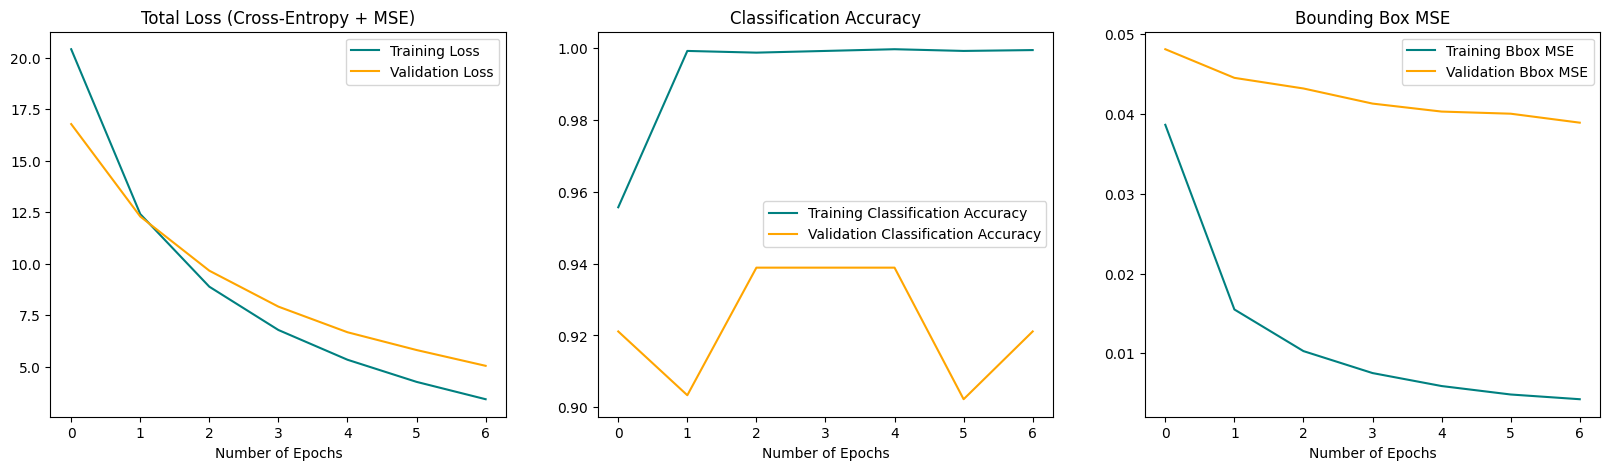

In [57]:
# Adjusting the plot based on actual keys and labels
fig, ax = plt.subplots(ncols=3, figsize=(20,5))

# First subplot for overall loss
ax[0].plot(history['loss'], color='teal', label='Training Loss')
ax[0].plot(history['val_loss'], color='orange', label='Validation Loss')
ax[0].set_title('Total Loss (Cross-Entropy + MSE)')
ax[0].set_xlabel('Number of Epochs')
ax[0].legend()

# Second subplot for classification accuracy
ax[1].plot(history['class_output_accuracy'], color='teal', label='Training Classification Accuracy')
ax[1].plot(history['val_class_output_accuracy'], color='orange', label='Validation Classification Accuracy')
ax[1].set_title('Classification Accuracy')
ax[1].set_xlabel('Number of Epochs')
ax[1].legend()

# Third subplot for regression loss
ax[2].plot(history['bbox_output_mse'], color='teal', label='Training Bbox MSE')
ax[2].plot(history['val_bbox_output_mse'], color='orange', label='Validation Bbox MSE')
ax[2].set_title('Bounding Box MSE')
ax[2].set_xlabel('Number of Epochs')
ax[2].legend()

plt.show()

### Display Bounding Box and Classification on Testing Data

#### Visualizing Predictions from a Face Detection Model

#### The following code snippet demonstrates how to visualize the predictions made by a face detection model using `matplotlib`, `numpy`, and `cv2` (OpenCV). The code includes loading test data, making predictions, and plotting the results with bounding boxes.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


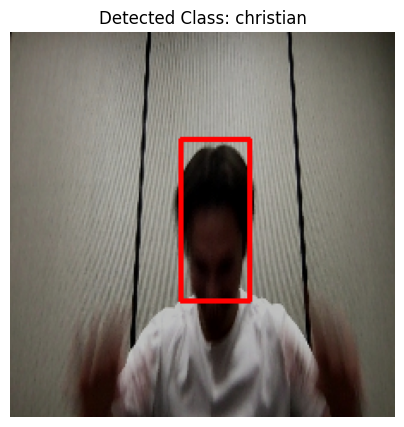

In [59]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
class_names = ['sharon', 'adi', 'christian', 'none']

test_data = test.as_numpy_iterator()
test_sample = test_data.next()
yhat = facetracker.predict(test_sample[0])
fig, ax = plt.subplots(figsize=(5, 5))  # Single subplot

# Assuming 'test_sample[0]' contains images and 'yhat' contains predictions
# Ensure there is at least one prediction and one test image
if len(test_sample[0]) > 0 and len(yhat[1]) > 0:
    sample_image = test_sample[0][0]  # First image
    sample_coords = yhat[1][0]       # First set of bounding box coordinates
    sample_image = np.array(sample_image).copy()
    class_probs = yhat[0][0]         # First set of class probabilities
    class_id = np.argmax(class_probs)
    max_prob = class_probs[class_id]

    if max_prob > 0.3:  # Change this threshold as needed
        x_min, y_min = np.multiply(sample_coords[:2], [224, 224]).astype(int)
        x_max, y_max = np.multiply(sample_coords[2:], [224, 224]).astype(int)
        cv2.rectangle(sample_image, (x_min, y_min), (x_max, y_max), (255, 0, 0), 2)

        # Optional: Draw label rectangle and text
        label_rect_start = (x_min, y_min - 30)
        label_rect_end = (x_min + 80, y_min)
        #cv2.rectangle(sample_image, label_rect_start, label_rect_end, (255, 0, 0), -1)
        #cv2.putText(sample_image, (x_min, y_min - 5), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)

    ax.imshow(sample_image)
    ax.set_title('Detected Class: ' + str(class_names[class_id]))
    ax.axis('off')

plt.show()


## Real Time Prediction using OpenCV

This code will not run in Colab as it does not have access to your machines hardware. However, if you run it in your local environment it will work.

In [ ]:
# Initializing the video capture
cap = cv2.VideoCapture(0)

class_names = ['sharon', 'adi', 'christian', 'none']  # List corresponding to the indices

#Continuously reads frames from the webcam until it fails
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        print("Failed to grab frame")
        break

    #Converts the frame from BGR to RGB (as OpenCV captures images in BGR format).
    #Resizes the frame to the input size expected by the model (224x224 pixels).    
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    resized = tf.image.resize(rgb, (224, 224))

    # Predict using the model
    yhat = facetracker.predict(np.expand_dims(resized / 255.0, axis=0))
    sample_coords = yhat[1][0]  # Bounding box predictions - double index converts to column instead of vector
    class_probs = yhat[0][0]    # Class probabilities

    class_id = np.argmax(class_probs) #Returns index of class with the highest probability
    max_prob = class_probs[class_id] #Grabs corresponding probability value

    if max_prob > 0.3 and class_id != 3:  # Check for a significant probability and valid face

        #Rescaling normalized coordinates to match frame size
        x_min, y_min = np.multiply(sample_coords[:2], [frame.shape[1], frame.shape[0]]).astype(int)
        x_max, y_max = np.multiply(sample_coords[2:], [frame.shape[1], frame.shape[0]]).astype(int)

        # Draw the bounding box
        cv2.rectangle(frame, (x_min, y_min), (x_max, y_max), (0, 0, 255), 1) #Controls color of bounding box, 2 size

        # Draw label rectangle and text
        label_text = class_names[class_id]  # Get the class name using the class ID
        label_rect_start = (x_min, y_min - 30) #This sets the starting point of the rectangle 30 pixels above the upper boundary of the bounding box to avoid overlapping with it.
        label_rect_end = (x_min + 80, y_min)#This sets the ending point of the rectangle 80 pixels to the right of the starting point, creating a rectangle width of 80 pixels.
        cv2.rectangle(frame, label_rect_start, label_rect_end, (0, 0, 255), -1)
        cv2.putText(frame, label_text,(x_min, y_min - 5), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2) #text is placed slightly above the upper boundary of the bounding box (5 pixels above)

    cv2.imshow('FaceTrack', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


If you've made this far then you got to experince how our face detection model can predict live images. We hope this was exciting for you as it was for us!